*Note*: You need to submit the assignment to be graded, and passing the validation button's test does not grade the assignment. The validation button's functionality is exactly the same as running all cells.

*If you plan to run the assignment locally:*
You can download the assignments and run them locally, but please be aware that as much as we would like our code to be universal, computer platform differences may lead to incorrectly reported errors even on correct solutions. Therefore, we encourage you to validate your solution in Coursera whenever this may be happening. If you decide to run the assignment locally, please: 
   1. Try to download the necessary data files from your home directory one at a time,
   2. Don't update anything other than this Jupyter notebook back to Coursera's servers, and 
   3. Make sure this notebook maintains its original name after you upload it back to Coursera.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from skimage import io

from scipy.special import logsumexp
from sklearn.cluster import KMeans

import PIL.Image
import IPython.display

from aml_utils import test_case_checker, perform_computation

# *Assignment Summary

**Image segmentation using EM**: You can segment an image using a clustering method - each segment is the cluster center to which a pixel belongs. In this exercise, you will represent an image pixel by its r, g, and b values (so use color images!). Apply the EM algorithm to the mixture of normal distributions model (also called Gaussian Mixture Model or GMM) to cluster image pixels, then segment the image by mapping each pixel to the cluster center with the highest value of the posterior probability for that pixel. Rather than using a package, you will implement the EM algorithm yourself. You will display results for the three included images, although you can use any color image you want.

* Segment each of the test images to 10, 20, and 50 segments. You should display these segmented images as images, where each pixel's color is replaced with the mean color of the closest segment.

* We will identify one special test image. You should segment this to 20 segments using five different start points, and display the result for each case. Is there much variation in the result? The test image is the sunset image

# *EM for Mixture of Normals in Matrix Form

For you convenience, we bring the reading assignment file here so that you can use it.

<font color='red'> **Caution** </font> Depending on your browser, you might need to right click on this pdf document to see the display options.

In [2]:
from IPython.display import IFrame
IFrame("../EMSegmentation-lib/EMSegmentation.pdf", width=1000, height=800)    

# 1. Implementing the Gaussian Mixture Model

## 1.1 The Expectation Step

# <span style="color:blue">Task 1</span>

Write a function `find_H` that calculates the 

$$H_{i,j} := -\frac{1}{2} \bigg[ (\mathbf{x}_i-\mathbf{\mu}_j)^T(\mathbf{x}_i-\mathbf{\mu}_j) \bigg]$$

matrix, and takes the following arguments as input:

1. `X`: A numpy array of the shape `(N,d)` where `N` is the number of pixels in the image (i.e., number of data points in this problem) and `d` is the number of fundamental pixel colors (i.e., dimension of the data space in this problem). 
  * Do not assume anything about `N` or `d` other than being positive integers.
  * Do not assume anything about `X`'s range of values or data type. 
  
  `X` is equivalent to the data matrix $X$ in the review document above.

2. `mu`: A numpy array of the shape `(K,d)` where `K` is the target number of clusters for clustering and `d` is the number of colors (i.e., dimension of the data space in this problem). Again, do not assume anything about `K` other than being a positive integer. This variable is equivalent to the means matrix $\mu$ in the review document above.

Your function should return the numpy array `H` with the shape of `(N, K)` and `np.float64` data type.

**Important Note**: Try and avoid using loops for constructing this pairwise distance matrix. You can find detailed explanation on how to efficiently compute $H$ in the document above.

In [22]:
def find_H(X, mu):
    """
    Calculate the matrix H_ij for the E-step.

    Parameters:
            X (np.array):  A numpy array of the shape (N,d) where N is the number of pixels in the image 
            (i.e., number of data points in this problem) 
            and d is the number of fundamental pixel colors (i.e., dimension of the data space in this problem). 
            
            mu (np.array): A numpy array of the shape (K,d) where K is the target number of clusters for clustering 
            and d is the number of colors (i.e., dimension of the data space in this problem).

    Returns:
            H (np.array): H_ij matrix for E-step with shape of (N, K) and np.float64 data type.
    """
    N = X.shape[0]
    K = mu.shape[0]
    assert X.shape[1] == mu.shape[1]
    
    # your code here
    d = X.shape[1]
    H1 = np.dot(X*X, np.ones((d,K)))

    H2 = np.dot(np.ones((N,d)), (mu*mu).T)
 
    H3 = np.dot(X, mu.T)
  
    H = -1/2 * (H1 + H2 - 2*H3)
  
    assert H.shape == (N,K)
    assert H.dtype == np.float64
    return H



In [23]:
some_X = np.array([[ 0,  1, 12,  3,  4],
                   [ 5, 16,  7,  8,  9],
                   [ 0, 11, 12, 13,  4],
                   [15, 16, 17,  8, 19],
                   [ 0,  1, 12,  3,  4],
                   [ 5, 16,  7,  8, 13],
                   [ 4, 15,  0,  5,  0]])

some_mu = np.array([[ 0,  1, 18, 15,  5],
                    [13,  9, 23,  3, 22],
                    [ 2, 10, 17,  4,  8]])

assert np.array_equal(find_H(some_X, some_mu), np.array([[ -90.5, -339. ,  -63.5],
                                                         [-218. , -281.5,  -81. ],
                                                         [ -70.5, -359. ,  -63.5],
                                                         [-348. ,  -61.5, -171. ],
                                                         [ -90.5, -339. ,  -63.5],
                                                         [-242. , -237.5,  -93. ],
                                                         [-330.5, -567. , -191.5]]))

In [ ]:
# Following are a bunch of hints to make your life easier duing debugging if you failed the pre-computed tests.
#
#   When an error is raised in checking against the pre-computed test database:
#
#     0. test_results will be a python dictionary, with the bug information stored in it. Don't be afraid to look into it!
#
#     1. You can access the failed test arguments by reading test_results['test_kwargs']. test_results['test_kwargs'] will be
#        another python dictionary with its keys being the argument names and the values being the argument values.
#
#     2. test_results['correct_sol'] will contain the correct solution.
#
#     3. test_results['stu_sol'] will contain your implementation's returned solution.



In [24]:
# Checking against the pre-computed test database
test_results = test_case_checker(find_H, task_id=1)
assert test_results['passed'], test_results['message']

# <span style="color:blue">Task 2</span>

Write a function `find_logW` that calculates the $\log W_{i,j}$ matrix, and takes the following arguments as input:

1. `H`: A numpy array of the shape `(N,K)` where `N` is the number of pixels in the image and `K` is the number of clusters. This is the supposed output of the `find_H` function you wrote, and is equivalent to the matrix $H$ in the review document above.
  * Do not assume anything about `N` or `K` other than being positive integers. 
2. `log_pi`: A numpy array of the shape `(K,1)` where `K` is the number of clusters. This variable is equivalent to the element-wise natural log of the prior probabilities vector $\pi$ in the review document above.

Your function should return the numpy array `logW` with the shape of `(N, K)` whose $i^{th}$ row and $j^{th}$ column should be

$$\log W_{i,j} := \log\bigg(\frac{\pi_j \exp\bigg(-\frac{1}{2} \bigg[ (\mathbf{x}_i-\mathbf{\mu}_j)^T(\mathbf{x}_i-\mathbf{\mu}_j) \bigg]\bigg)}{\sum_{l=1}^{K} \pi_l \exp\bigg(-\frac{1}{2} \bigg[ (\mathbf{x}_i-\mathbf{\mu}_l)^T(\mathbf{x}_i-\mathbf{\mu}_l) \bigg]\bigg)}\bigg)$$

**Important Note**: You **should** use the `logsumexp` function imported above from scipy's library to make sure that numerical stability would not be a problem. In other words, don't try and exponentiate the vector `log_pi` to obtain the $\pi$ vector; this will result in numerical instability. 

In [70]:
def find_logW(H, log_pi):
    """
    Calculate the logW_ij matrix for the E-step.

    Parameters:
            H (np.array):  A numpy array of the shape (N,K) 
            where N is the number of pixels in the image and K is the number of clusters. 
            
            log_pi (np.array): A numpy array of the shape (K,1) where K is the number of clusters.

    Returns:
            logW (np.array): lowW_ij matrix for the E-step with shape of (N, K).
    """
    
    N, K = H.shape
    
    # your code here
    
    logP= np.ones((N,1)) * log_pi.T

    logF = logsumexp(H+logP, axis = 1,keepdims=True)


    logW = H + logP - logF

    
    assert logW.shape == (N,K)
    assert not np.isnan(logW).any()
    assert not np.isinf(logW).any()
    return logW



In [71]:
some_X = np.array([[ 0,  1, 12,  3,  4],
                   [ 5, 16,  7,  8,  9],
                   [ 0, 11, 12, 13,  4],
                   [15, 16, 17,  8, 19],
                   [ 0,  1, 12,  3,  4],
                   [ 5, 16,  7,  8, 13],
                   [ 4, 15,  0,  5,  0]])

some_mu = np.array([[ 0,  1, 18, 15,  5],
                    [13,  9, 23,  3, 22],
                    [ 2, 10, 17,  4,  8]])

some_H = np.array([[ -90.5, -339. ,  -63.5],
                   [-218. , -281.5,  -81. ],
                   [ -70.5, -359. ,  -63.5],
                   [-348. ,  -61.5, -171. ],
                   [ -90.5, -339. ,  -63.5],
                   [-242. , -237.5,  -93. ],
                   [-330.5, -567. , -191.5]])

some_log_pi = np.log(some_mu.sum(axis=1)/some_mu.sum()).reshape(-1,1)

some_logW = find_logW(some_H, some_log_pi)

assert np.allclose(some_logW.round(2), np.array([[ -27.05, -274.97,   -0.  ],
                                                 [-137.05, -199.97,    0.  ],
                                                 [  -7.05, -294.97,   -0.  ],
                                                 [-287.08,    0.  , -110.03],
                                                 [ -27.05, -274.97,   -0.  ],
                                                 [-149.05, -143.97,    0.  ],
                                                 [-139.05, -374.97,    0.  ]]))

In [ ]:
# Following are a bunch of hints to make your life easier duing debugging if you failed the pre-computed tests.
#
#   When an error is raised in checking against the pre-computed test database:
#
#     0. test_results will be a python dictionary, with the bug information stored in it. Don't be afraid to look into it!
#
#     1. You can access the failed test arguments by reading test_results['test_kwargs']. test_results['test_kwargs'] will be
#        another python dictionary with its keys being the argument names and the values being the argument values.
#
#     2. test_results['correct_sol'] will contain the correct solution.
#
#     3. test_results['stu_sol'] will contain your implementation's returned solution.



In [72]:
# Checking against the pre-computed test database
test_results = test_case_checker(find_logW, task_id=2)
assert test_results['passed'], test_results['message']

## 1.2 The Maximization Step

# <span style="color:blue">Task 3</span>

Write a function `update_logpi` that computes the $\log \pi^{\text{new}}$ vector, and takes the following argument as input:

1. `logW`: A numpy array of the shape `(N,K)` where `N` is the number of pixels in the image and `K` is the number of clusters. This is the supposed output of the `find_logW` function you wrote, and is equivalent to the matrix $\log W$ in the review document above.
  * Do not assume anything about `N` or `K` other than being positive integers. 

Your function should return the numpy array `log_pi` with the shape of `(K, 1)` whose $j^{th}$ element should be

$$\log \pi^{\text{new}}_{j} := \log \frac{\sum_{i=1}^N W_{i,j}}{N}$$

**Important Note**: You **should** use the `logsumexp` function imported above from scipy's library to make sure that numerical stability would not be a problem. In other words, don't try and exponentiate the matrix `logW` to obtain the $W$ matrix; this will result in numerical instability. 

**Important Note**: Try and avoid using loops for constructing this posterior. You can find detailed explanation on how to efficiently compute $\log \pi^{\text{new}}$ in the document above.

In [79]:
def update_logpi(logW):
    """
    Compute the log pi vector.

    Parameters:
            logW (np.array): A numpy array of the shape (N,K) 
            where N is the number of pixels in the image and K is the number of clusters. 

    Returns:
            log_pi (np.array):  log pi vector with shape of (K, 1).
    """
    
    N,K = logW.shape
    
    # your code here

    log_pi = logsumexp(logW.T,axis=1,keepdims=True) - np.log(N)

    
    assert log_pi.shape == (K,1)
    assert not np.isnan(log_pi).any()
    assert not np.isinf(log_pi).any()
    
    return log_pi



In [80]:
some_logW = np.array([[ -27.05, -274.97,   -0.  ],
                      [-137.05, -199.97,    0.  ],
                      [  -7.05, -294.97,   -0.  ],
                      [-287.08,    0.  , -110.03],
                      [ -27.05, -274.97,   -0.  ],
                      [-149.05, -143.97,    0.  ],
                      [-139.05, -374.97,    0.  ]])

some_logpi_new = update_logpi(some_logW)

assert np.array_equal(some_logpi_new.round(2), np.array([[-9.  ],
                                                         [-1.95],
                                                         [-0.15]]))

In [ ]:
# Following are a bunch of hints to make your life easier duing debugging if you failed the pre-computed tests.
#
#   When an error is raised in checking against the pre-computed test database:
#
#     0. test_results will be a python dictionary, with the bug information stored in it. Don't be afraid to look into it!
#
#     1. You can access the failed test arguments by reading test_results['test_kwargs']. test_results['test_kwargs'] will be
#        another python dictionary with its keys being the argument names and the values being the argument values.
#
#     2. test_results['correct_sol'] will contain the correct solution.
#
#     3. test_results['stu_sol'] will contain your implementation's returned solution.



In [81]:
# Checking against the pre-computed test database
test_results = test_case_checker(update_logpi, task_id=3)
assert test_results['passed'], test_results['message']

# <span style="color:blue">Task 4</span>

Write a function `update_mu` that computes the $\mu^{\text{new}}$ matrix, and takes the following arguments as input:

1. `X`: A numpy array of the shape `(N,d)` where `N` is the number of pixels in the image (i.e., number of data points in this problem) and `d` is the number of fundamental pixel colors (i.e., dimension of the data space in this problem). 
  * Do not assume anything about `N` or `d` other than being positive integers.
  * Do not assume anything about `X`'s range of values or data type. 
  
  `X` is equivalent to the data matrix $X$ in the review document above.
2. `logW`: A numpy array of the shape `(N,K)` where `N` is the number of documents and `K` is the number of clusters. This is the supposed output of the `find_logW` function you wrote, and is equivalent to the matrix $\log W$ in the review document above.
  * Do not assume anything about `K` other than being a positive integer. 

Your function should return the numpy array `mu` with the shape of `(K, d)` whose $j^{th}$ centroid should be

$$\mathbf{\mu}_j^{new} = \frac{\sum_{i=1}^N \mathbf{x_i} W_{i,j}}{\sum_{i=1}^N W_{i,j}}$$

**Important Note**: Try and avoid using loops for constructing this posterior. You can find detailed explanation on how to efficiently compute $\mu^{\text{new}}$ in the document above.

In [90]:
def update_mu(X, logW):
    """
    Compute the updated mu matrix.

    Parameters:
            X (np.array): A numpy array of the shape (N,d) 
            where N is the number of pixels in the image (i.e., number of data points in this problem) 
            and d is the number of fundamental pixel colors (i.e., dimension of the data space in this problem). 
            
            logW (np.array): A numpy array of the shape (N,K) 
            where N is the number of documents and K is the number of clusters.

    Returns:
            mu (np.array):  mu matrix with shape of (K, d).
    """
        
    N,K = logW.shape
    d = X.shape[1]
    assert X.shape[0] == N
    
    # your code here

    R = np.exp(logW.T)
    R_X = np.matmul(R, X)


    R_ones = logsumexp(logW,axis=0,keepdims=True).T

    mu = np.exp(np.log(R_X) - R_ones)
    
    assert mu.shape == (K,d)
    assert not np.isnan(mu).any()
    assert not np.isinf(mu).any()
    return mu



In [91]:
some_X = np.array([[ 0,  1, 12,  3,  4],
                   [ 5, 16,  7,  8,  9],
                   [ 0, 11, 12, 13,  4],
                   [15, 16, 17,  8, 19],
                   [ 0,  1, 12,  3,  4],
                   [ 5, 16,  7,  8, 13],
                   [ 4, 15,  0,  5,  0]])

some_logW = np.array([[ -27.05, -274.97,   -0.  ],
                      [-137.05, -199.97,    0.  ],
                      [  -7.05, -294.97,   -0.  ],
                      [-287.08,    0.  , -110.03],
                      [ -27.05, -274.97,   -0.  ],
                      [-149.05, -143.97,    0.  ],
                      [-139.05, -374.97,    0.  ]])

some_mu_new = update_mu(some_X, some_logW)

assert np.array_equal(some_mu_new.round(3), np.array([[ 0.   , 11.   , 12.   , 13.   ,  4.   ],
                                                      [15.   , 16.   , 17.   ,  8.   , 19.   ],
                                                      [ 2.333, 10.   ,  8.333,  6.667,  5.667]]))

In [ ]:
# Following are a bunch of hints to make your life easier duing debugging if you failed the pre-computed tests.
#
#   When an error is raised in checking against the pre-computed test database:
#
#     0. test_results will be a python dictionary, with the bug information stored in it. Don't be afraid to look into it!
#
#     1. You can access the failed test arguments by reading test_results['test_kwargs']. test_results['test_kwargs'] will be
#        another python dictionary with its keys being the argument names and the values being the argument values.
#
#     2. test_results['correct_sol'] will contain the correct solution.
#
#     3. test_results['stu_sol'] will contain your implementation's returned solution.



In [92]:
# Checking against the pre-computed test database
test_results = test_case_checker(update_mu, task_id=4)
assert test_results['passed'], test_results['message']

## 1.3 Writing the full Expectation-Maximization Iteration

In [93]:
def GMM(X, K, initialization_method='kmeans', iterations=100, seed=12345):
    N, d = X.shape
    pi_init = np.ones((K,1))/float(K)
    
    np_random = np.random.RandomState(seed=seed)
    if initialization_method == 'random_pixels':
        mu_init = X[np_random.choice(N, K), :] # mu.shape = (K, d)
    elif initialization_method == 'kmeans':
        kmeans = KMeans(n_clusters=K, random_state=np_random).fit(X)
        mu_init = kmeans.cluster_centers_  # mu.shape = (K, d)

    log_pi = np.log(pi_init) #log_pi.shape = (K,1)
    mu = mu_init

    for iteration in range(iterations):
        print('.', end='')
        #The E-Step
        H = find_H(X, mu)
        logW = find_logW(H, log_pi)

        #The M-Step
        log_pi = update_logpi(logW)
        mu = update_mu(X, logW)
    print('', end=' ')
    
    return mu, H, log_pi

In [94]:
def segment(raw_image, K, initialization_method ='random_pixels', seed=12345):
    mu, H, log_pi = GMM(X=raw_image.reshape(-1, 3), K=K, 
                        initialization_method=initialization_method, 
                        iterations=10, seed=seed)
    reconst_image = mu[H.argmax(axis=1), :].reshape(*raw_image.shape)

    fig, axes = plt.subplots(1,2, figsize=(8,4), dpi=144)

    ax = axes[0]
    ax.imshow(raw_image)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Original Image')

    ax = axes[1]
    ax.imshow(reconst_image.astype(np.uint8))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Segmented Image (K={K})')

    fig.tight_layout()

# 2. Image Segmentation

## 2.1 The Sunset Image

.......... .......... .......... 

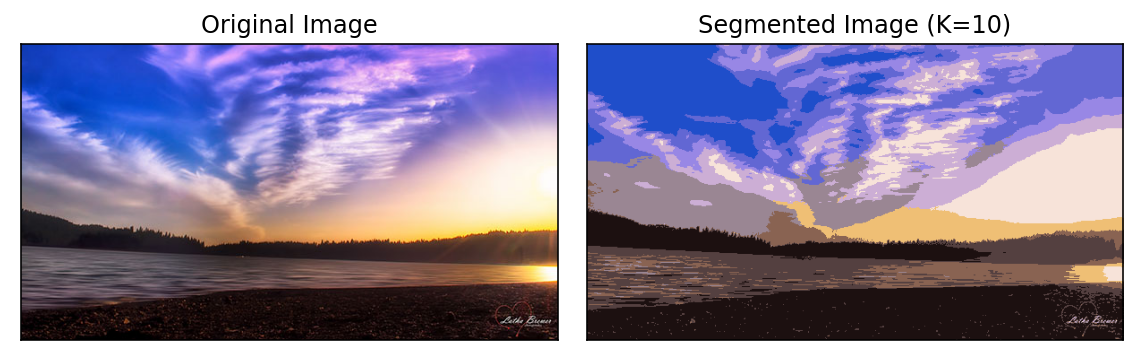

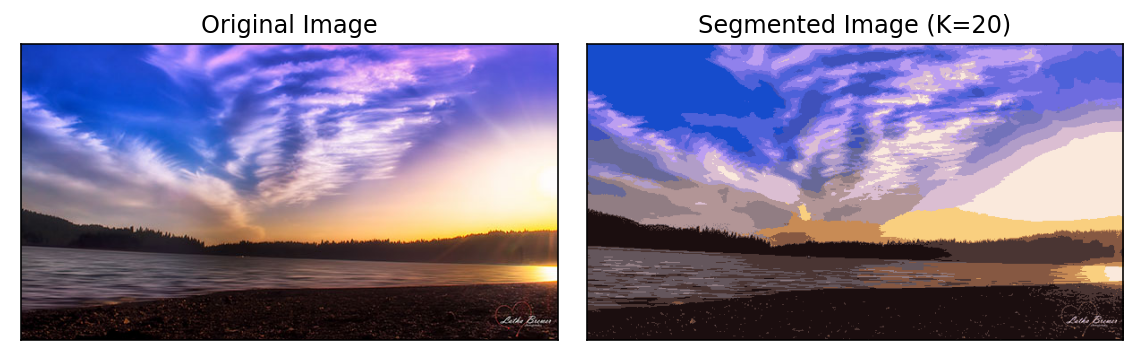

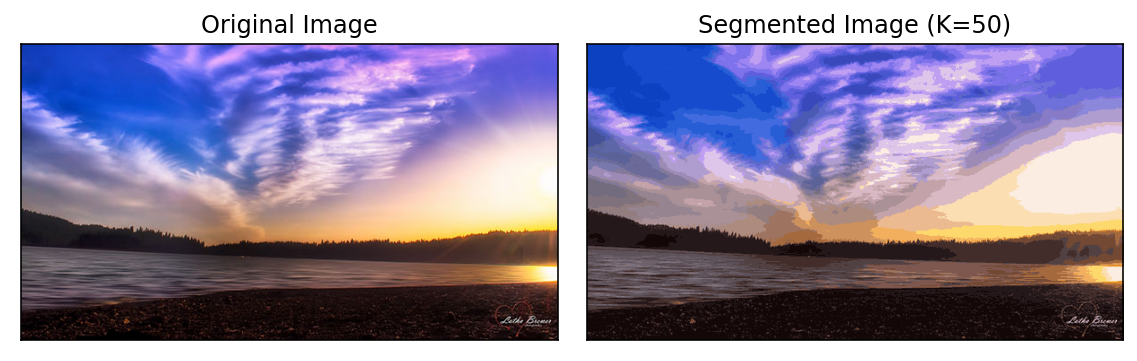

In [95]:
if perform_computation:
    raw_image = io.imread('../EMSegmentation-lib/pics/smallsunset.jpg')
    segment(raw_image, 10)
    segment(raw_image, 20)
    segment(raw_image, 50)

## 2.2 The Flower Image

.......... .......... .......... 

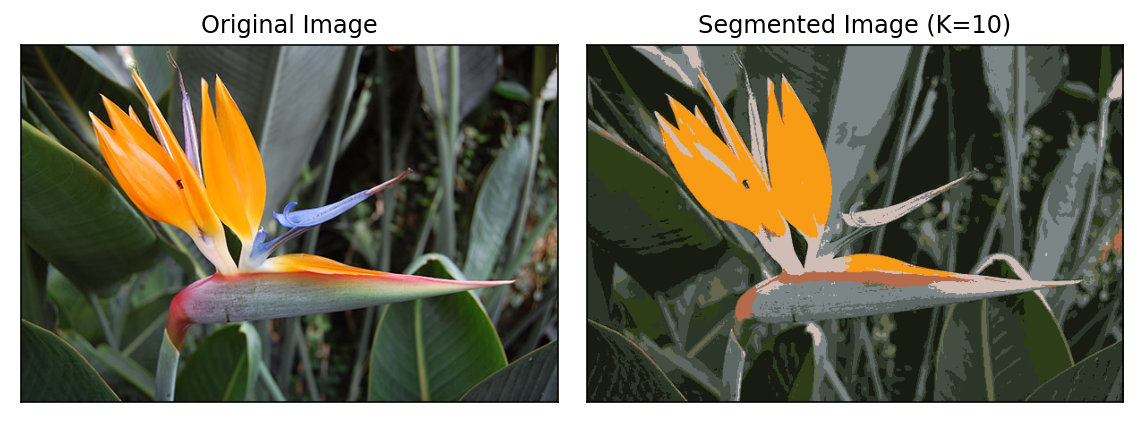

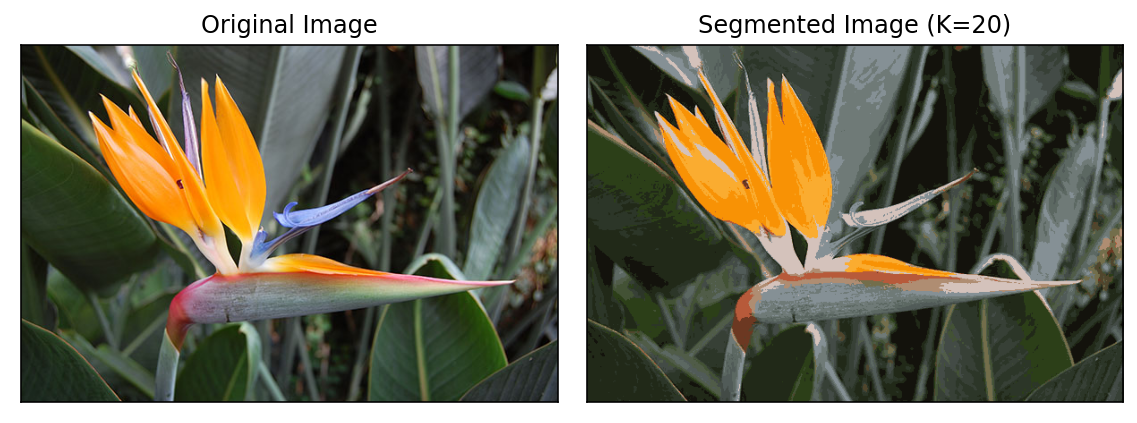

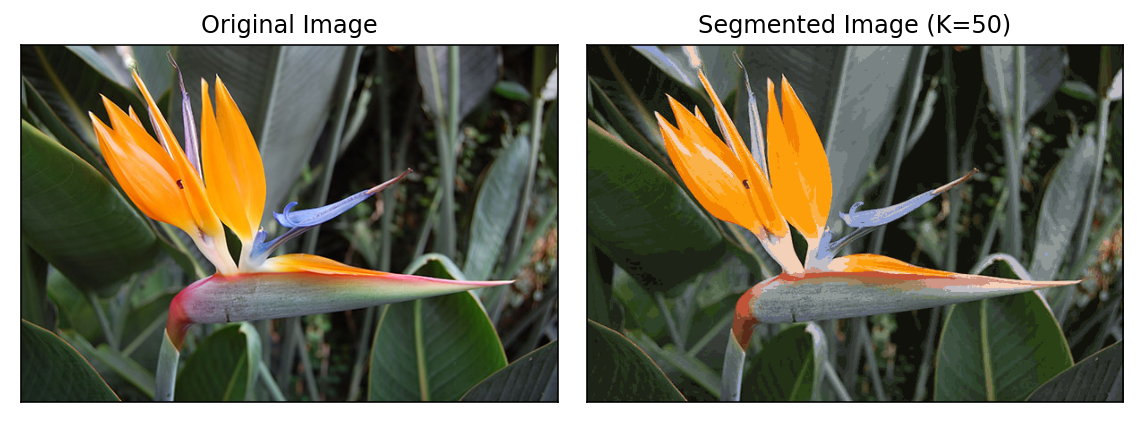

In [96]:
if perform_computation:
    raw_image = io.imread('../EMSegmentation-lib/pics/smallstrelitzia.jpg')
    segment(raw_image, 10)
    segment(raw_image, 20)
    segment(raw_image, 50)

## 2.3 The Fish Image

.......... .......... .......... 

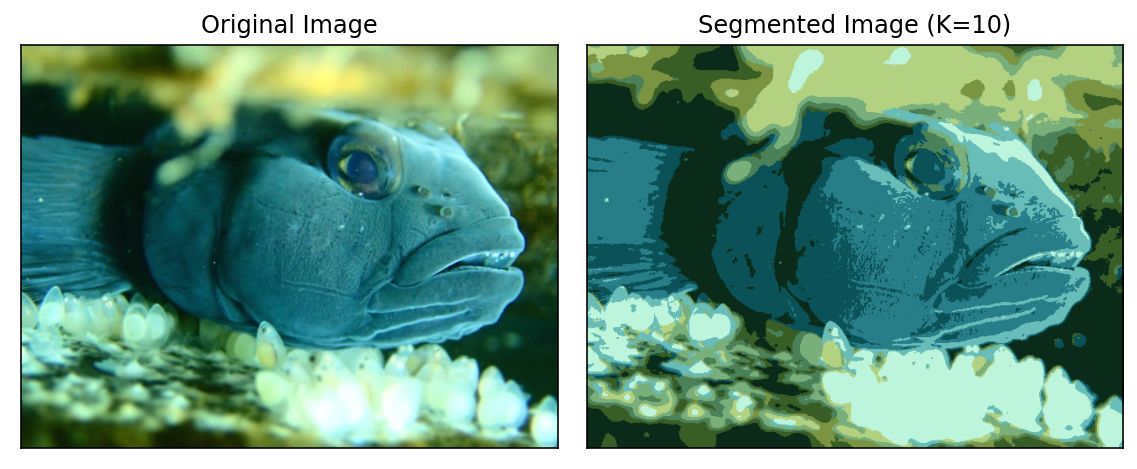

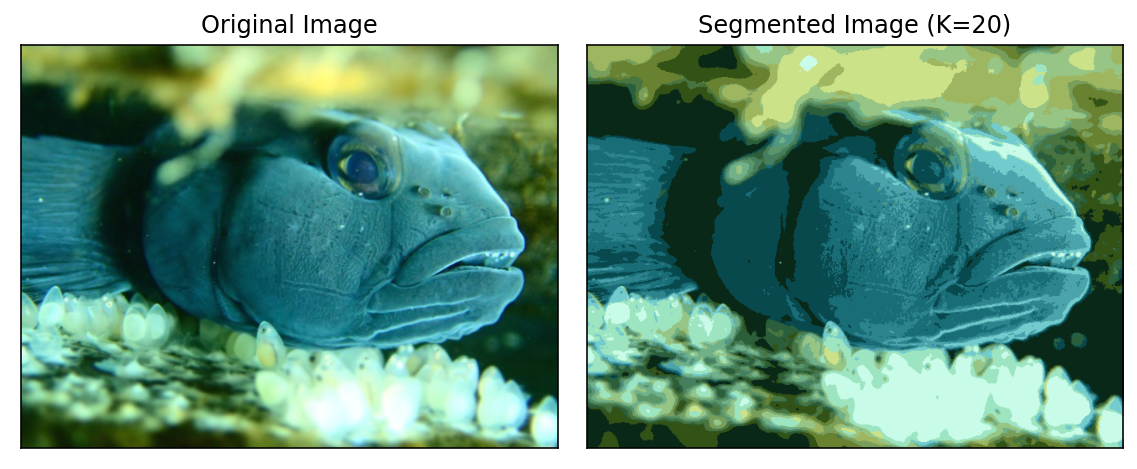

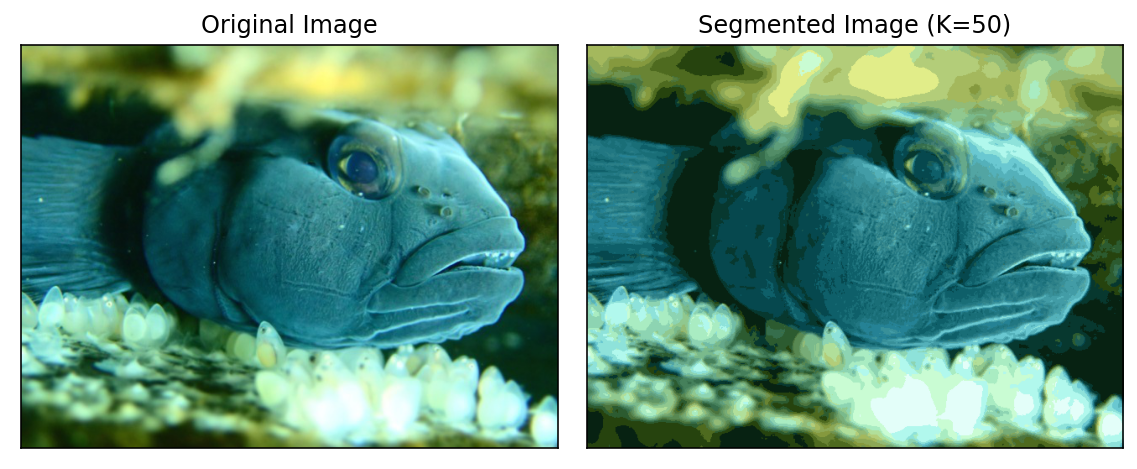

In [97]:
if perform_computation:
    raw_image = io.imread('../EMSegmentation-lib/pics/RobertMixed03.jpg')
    segment(raw_image, 10)
    segment(raw_image, 20)
    segment(raw_image, 50)